In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler


# Phase 1: Data Collection

pd.set_option("expand_frame_repr", False)
df= pd.read_csv('data.csv')
df2 = pd.DataFrame(df)
df2.columns = ['Nickname','Defender Score','Attacker Score','Time (sec)','Winner','Level']
df2

,Nickname,Defender Score,Attacker Score,Time (sec),Winner,Level
0,Zulu,4.0,9.0,472.0,Attacker,Beginner
1,ZOOL,7.0,6.0,294.0,Defender,Beginner
2,zuluu,6.0,7.0,290.0,Attacker,Beginner
3,zuloo,5.0,8.0,283.0,Attacker,Beginner
4,zoolu,5.0,8.0,283.0,Attacker,Beginner
...,...,...,...,...,...,...
1468,u21791938,8.0,5.0,214.0,Defender,Beginner
1469,u21791938,7.0,6.0,207.0,Defender,Beginner
1470,u21791938,6.0,7.0,201.0,Attacker,Beginner
1471,u21791938,5.0,8.0,184.0,Attacker,Beginner


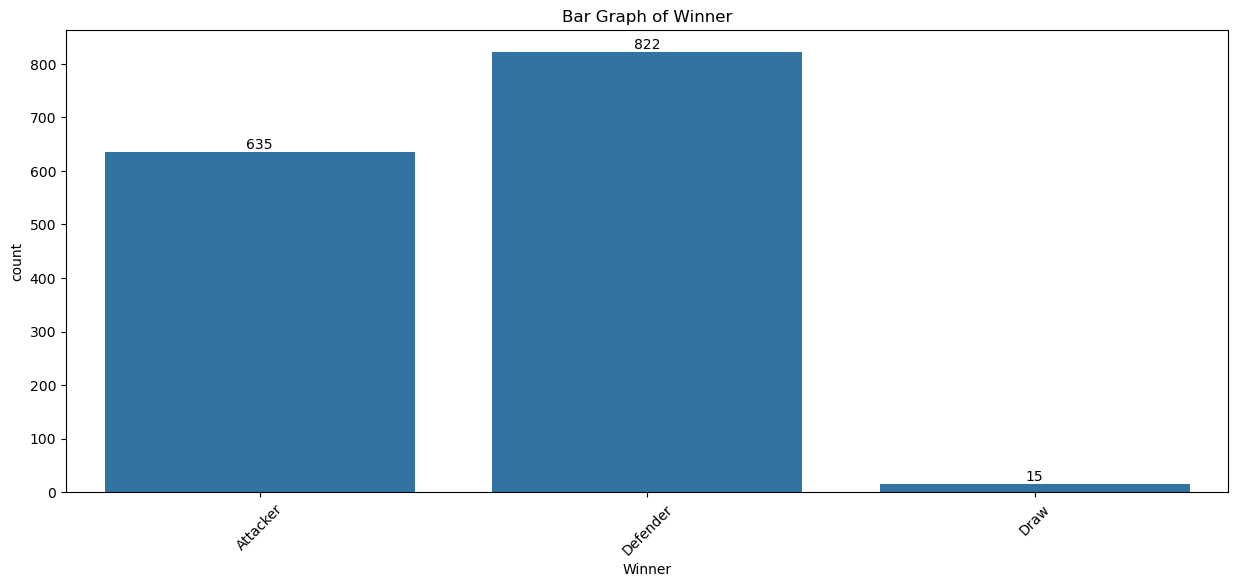

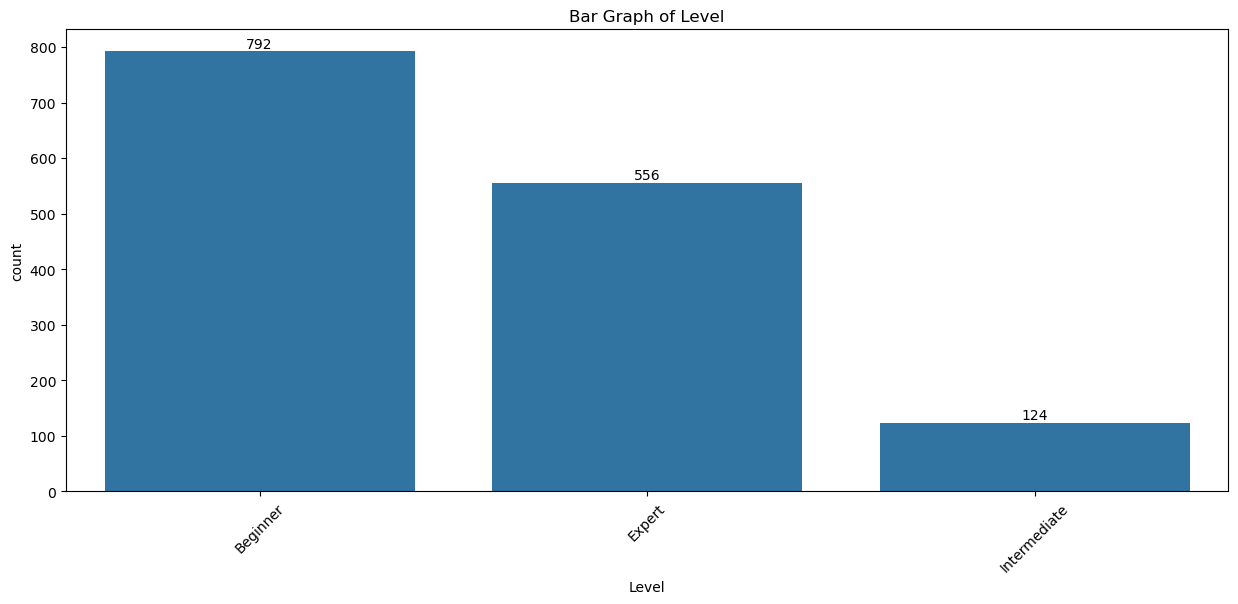

In [23]:
# Winner count

plt.figure(figsize=(15, 6))
ax = sns.countplot(x=df2['Winner'], data=df2)
plt.title('Bar Graph of Winner')
plt.xticks(rotation=45)
plt.xticks(fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Level count

plt.figure(figsize=(15, 6))
ax = sns.countplot(x=df2['Level'], data=df2)
plt.title('Bar Graph of Level')
plt.xticks(rotation=45)
plt.xticks(fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

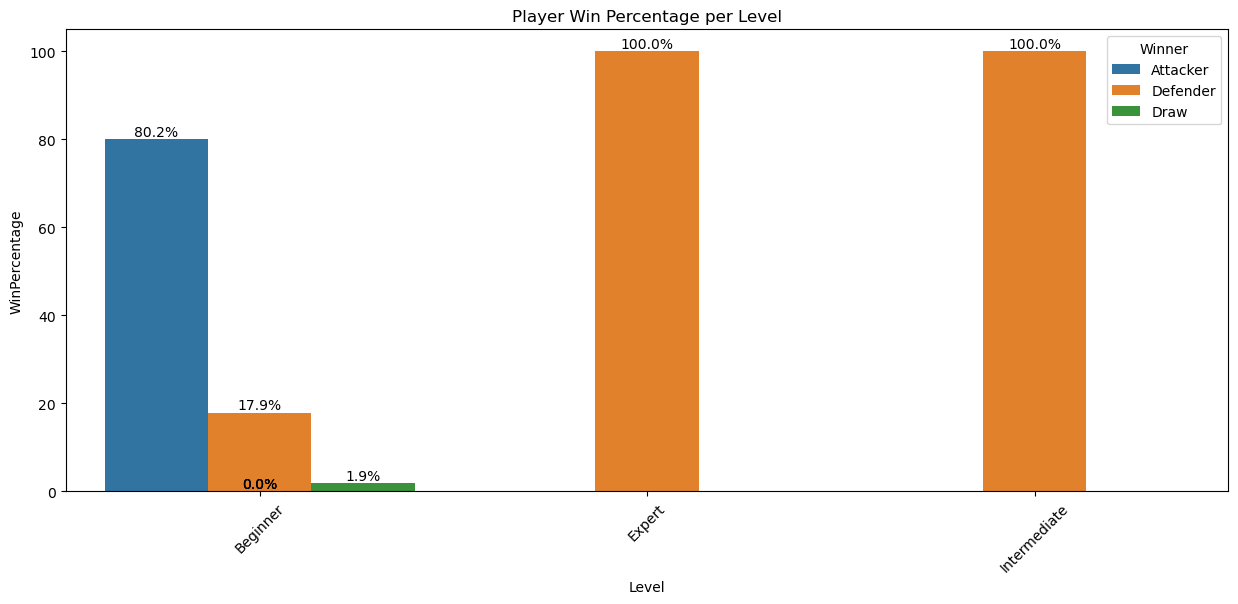

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total number of entries for each level
level_counts = df2['Level'].value_counts()

# Calculate the number of wins for each level
level_winner_counts = df2.groupby(['Level', 'Winner']).size().reset_index(name='WinnerCount')

# Merge both counts to calculate the win percentage
level_winner_counts = level_winner_counts.merge(level_counts.rename('TotalCount'), left_on='Level', right_index=True)
level_winner_counts['WinPercentage'] = (level_winner_counts['WinnerCount'] / level_winner_counts['TotalCount']) * 100

# Now plot the win percentages for each level and player
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Level', y='WinPercentage', hue='Winner', data=level_winner_counts)
plt.title('Player Win Percentage per Level')
plt.xticks(rotation=45)
plt.xticks(fontsize=10)

# Annotate the bars with win percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [1]:
from sklearn import preprocessing

lab_encoder = preprocessing.LabelEncoder()
df2['Nickname'] = lab_encoder.fit_transform(df2['Nickname'])
df2['Defender Score'] = lab_encoder.fit_transform(df2['Defender Score'])
df2['Attacker Score'] = lab_encoder.fit_transform(df2['Attacker Score'])
df2['Time (sec)'] = lab_encoder.fit_transform(df2['Time (sec)'])
df2['Winner'] = lab_encoder.fit_transform(df2['Winner'])
df2['Level'] = lab_encoder.fit_transform(df2['Level'])
df2

NameError: name 'df' is not defined

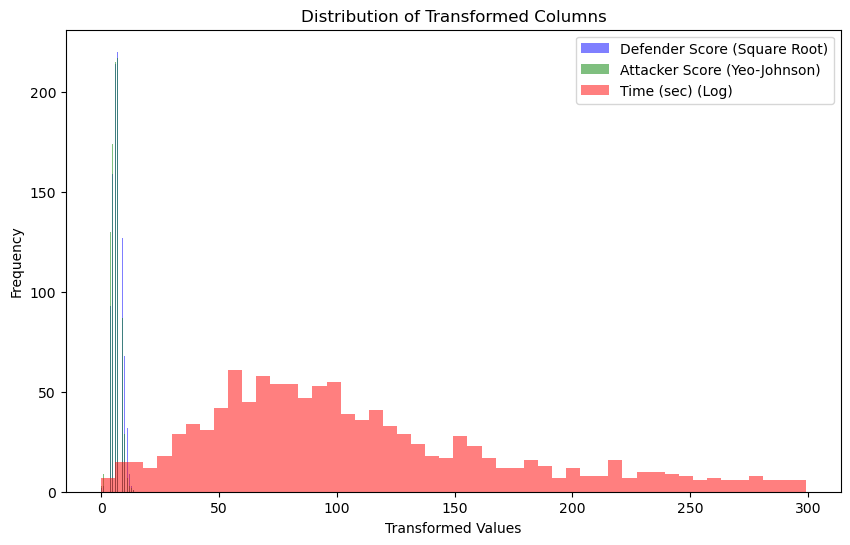

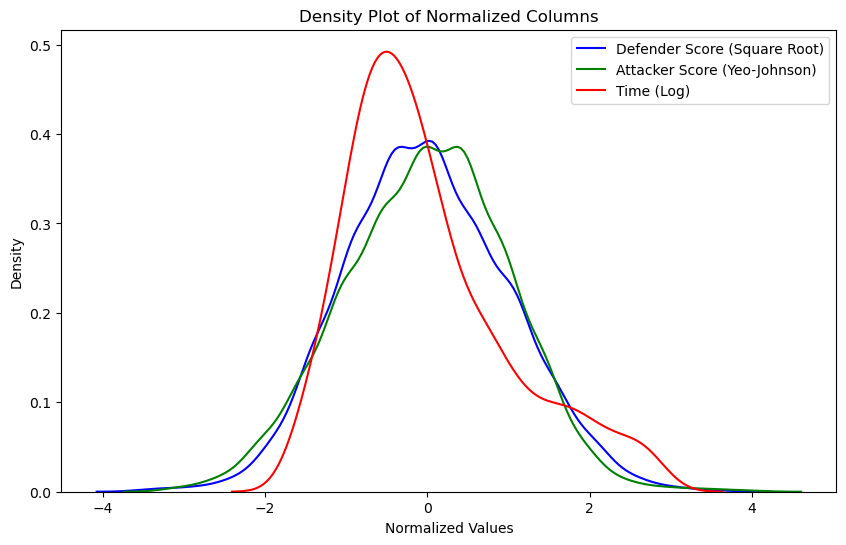

In [26]:

# Phase 2: Data Preparation (feature engineering and data transformation)
df2 = df2.drop_duplicates()

#--PLOTING TRANSFORMED DATA--#
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df2['Defender Score'], bins=50, alpha=0.5, color='blue', label='Defender Score (Square Root)')
ax.hist(df2['Attacker Score'], bins=50, alpha=0.5, color='green', label='Attacker Score (Yeo-Johnson)')
ax.hist(df2['Time (sec)'], bins=50, alpha=0.5, color='red', label='Time (sec) (Log)')

# Add labels and a legend
ax.set_xlabel('Transformed Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Transformed Columns')
ax.legend()

plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
scaler = StandardScaler()

# Normalize each column's features
df2_normalized = df2.copy()
df2_normalized[['Defender Score', 'Attacker Score', 'Time (sec)']] = scaler.fit_transform(df2[['Defender Score', 'Attacker Score', 'Time (sec)']])
sns.kdeplot(df2_normalized['Defender Score'], color='blue', label='Defender Score (Square Root)', ax=ax)
sns.kdeplot(df2_normalized['Attacker Score'], color='green', label='Attacker Score (Yeo-Johnson)', ax=ax)
sns.kdeplot(df2_normalized['Time (sec)'], color='red', label='Time (Log)', ax=ax)

ax.set_xlabel('Normalized Values')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Normalized Columns')
ax.legend()

plt.show()

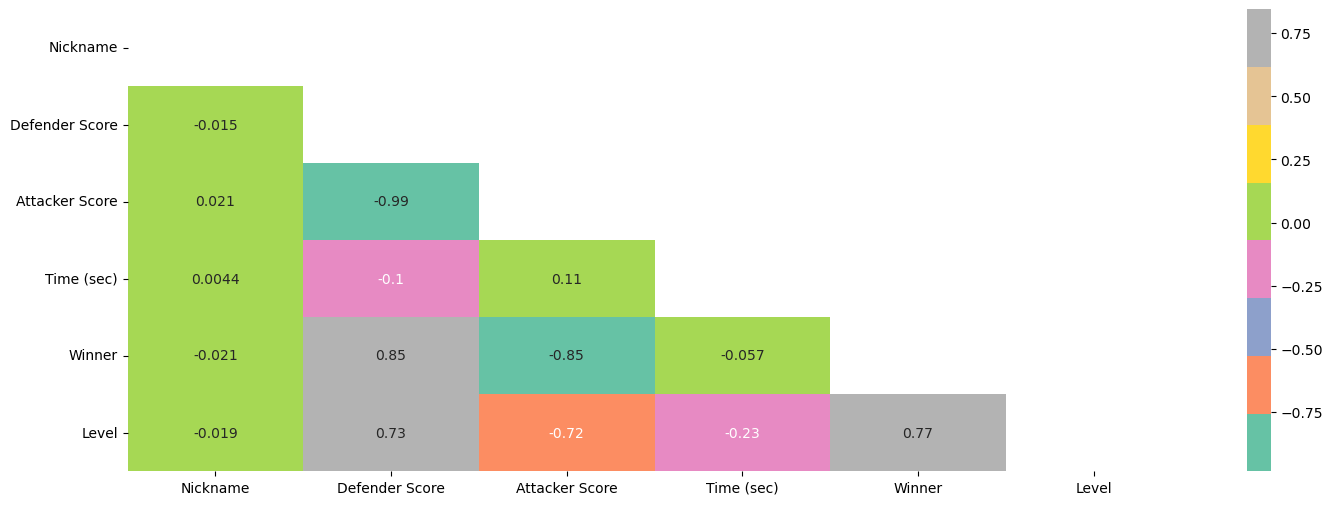

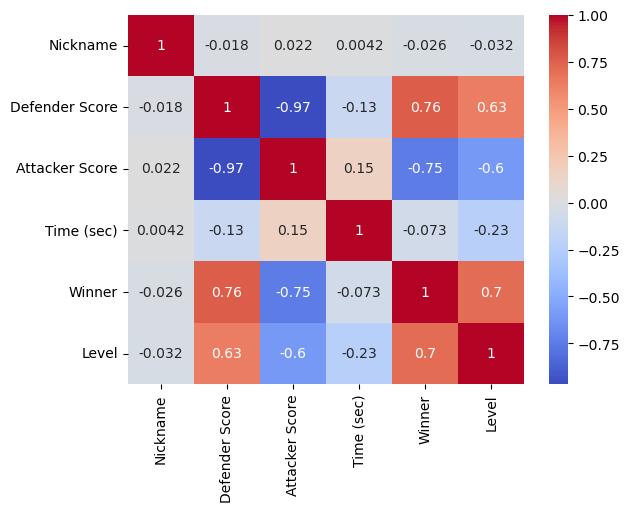

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(17, 6))
corr = df2.corr(method='spearman')
my_m = np.triu(corr)
sns.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

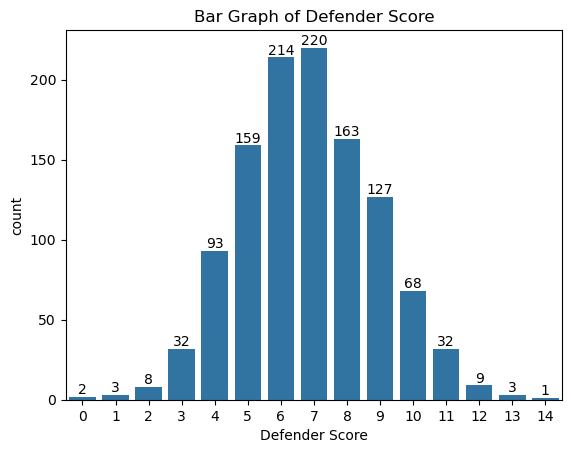

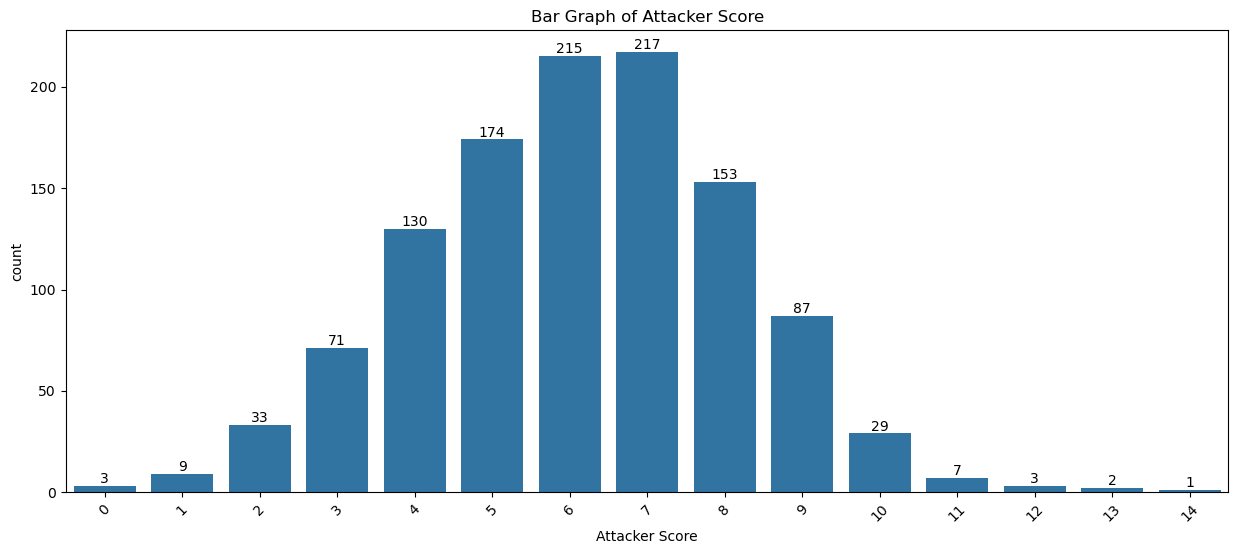

In [29]:
# Phase 3: Data Visualization

# --- Count visualizations --- #

# Categorical count visualizations
# Defender Score count

ax = sns.countplot(x=df2['Defender Score'], data=df2)
plt.title('Bar Graph of Defender Score')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Attacker count

plt.figure(figsize=(15, 6))
ax = sns.countplot(x=df2['Attacker Score'], data=df2)
plt.title('Bar Graph of Attacker Score')
plt.xticks(rotation=45)
plt.xticks(fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


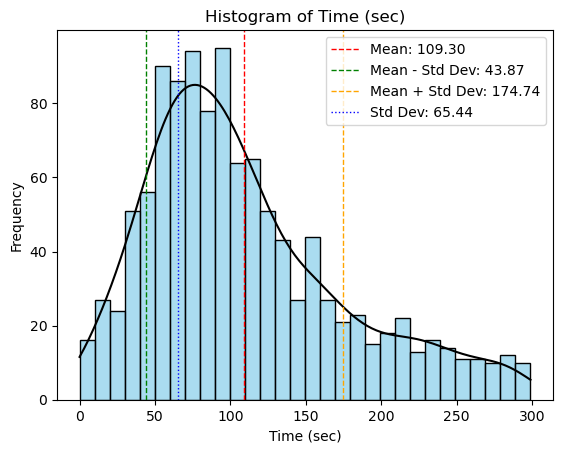

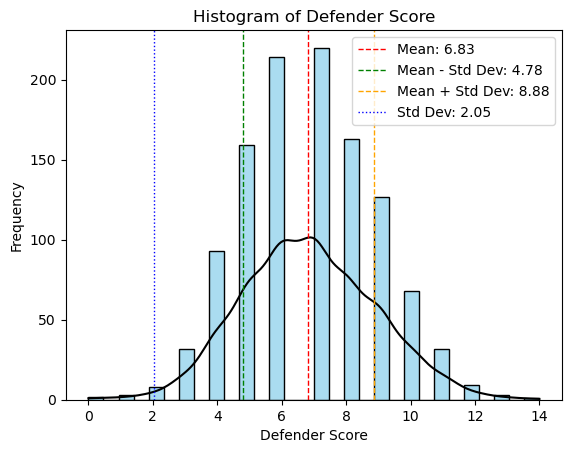

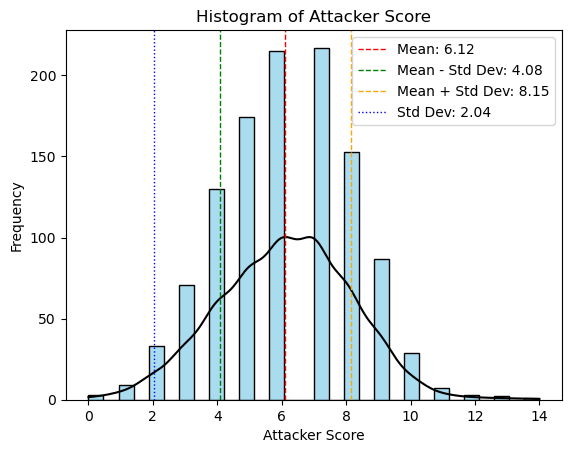

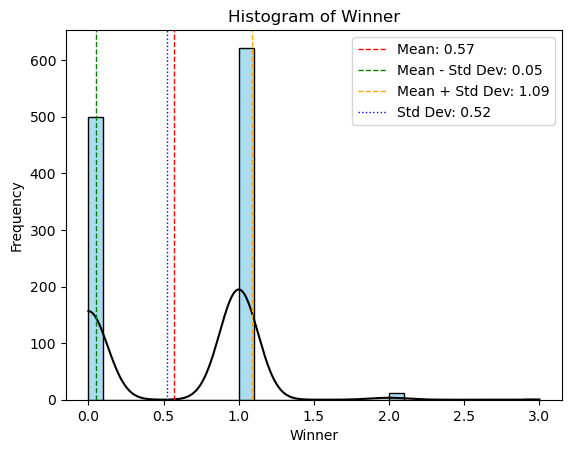

In [30]:
# --- Numeric visualizations (count, mean and standard deviation) --- #

# Time

feature = 'Time (sec)'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# # Defender Score

feature = 'Defender Score'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# # Attacker Score

feature = 'Attacker Score'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Winner

feature = 'Winner'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

X = df2.iloc[:, :-1] 

y = df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42) 

In [33]:
X_train
X_test
y_train
y_test

1110    1
1226    2
486     0
571     0
1072    0
       ..
66      1
1224    1
67      1
750     1
530     1
Name: Level, Length: 227, dtype: int32

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 


from sklearn.tree import DecisionTreeClassifier
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=42) 

rf.fit(X_train, y_train)

rf_pred=rf.predict(X_test)

rf_accuracy = accuracy_score(rf_pred, y_test)
rf_report = classification_report(rf_pred, y_test)
rf_matrix = confusion_matrix(rf_pred, y_test)
print('Accuracy of Random Forest : ', round(rf_accuracy, 3))
print('Classification report of Random Forest : \n', rf_report)
print('Confusion Matrix of Random Forest : \n', rf_matrix)

Accuracy of Random Forest :  1.0
Classification report of Random Forest : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        18

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227

Confusion Matrix of Random Forest : 
 [[122   0   0]
 [  0  87   0]
 [  0   0  18]]


In [38]:
svr = LinearSVC()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

svr_accuracy = accuracy_score(svr_pred, y_test)
svr_report = classification_report(svr_pred, y_test)
svr_matrix = confusion_matrix(svr_pred, y_test)
print('Accuracy of SVM : ', round(svr_accuracy, 3))
print('Classification report of SVM : \n', svr_report)
print('Confusion Matrix of SVM :\n', svr_matrix)

Accuracy of SVM :  0.868
Classification report of SVM : 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       116
           1       1.00      0.79      0.88       110
           2       0.00      0.00      0.00         1

    accuracy                           0.87       227
   macro avg       0.63      0.58      0.60       227
weighted avg       0.95      0.87      0.90       227

Confusion Matrix of SVM :
 [[110   0   6]
 [ 11  87  12]
 [  1   0   0]]


Accuracy of Naive Bayes :  0.943
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       112
           1       0.99      0.97      0.98        89
           2       0.89      0.62      0.73        26

    accuracy                           0.94       227
   macro avg       0.93      0.86      0.89       227
weighted avg       0.94      0.94      0.94       227

Confusion Matrix of Naive Bayes :

 [[112   0   0]
 [  1  86   2]
 [  9   1  16]]


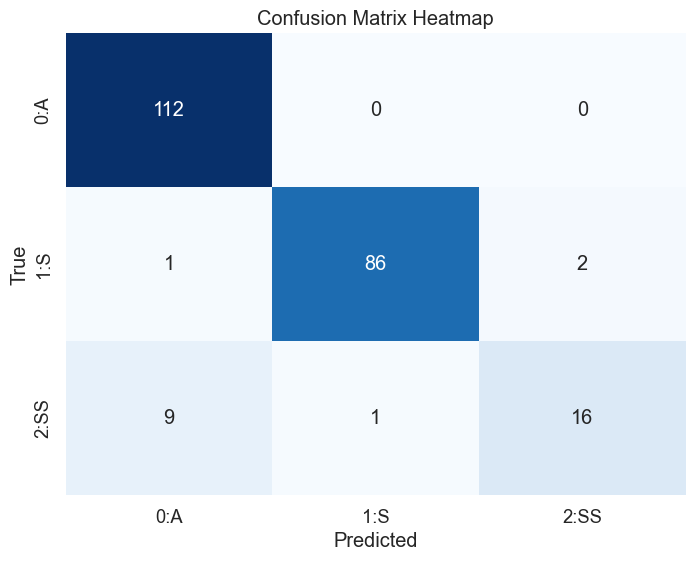

In [40]:
#Naive Bayes Algorithm

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)


nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test)
nb_matrix = confusion_matrix(nb_pred, y_test)
print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', nb_report)
print('Confusion Matrix of Naive Bayes :\n\n', nb_matrix)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")

plt.show()

In [55]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=42)),
    ('svr', LinearSVC(random_state=42))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB())


In [56]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)


Accuracy of Ensemble Model :  0.537
Confusion Matrix of Ensemble Model :  [[122  87  18]
 [  0   0   0]
 [  0   0   0]]
Classification Report of Ensemble Model: 

               precision    recall  f1-score   support

           0       1.00      0.54      0.70       227
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.54       227
   macro avg       0.33      0.18      0.23       227
weighted avg       1.00      0.54      0.70       227



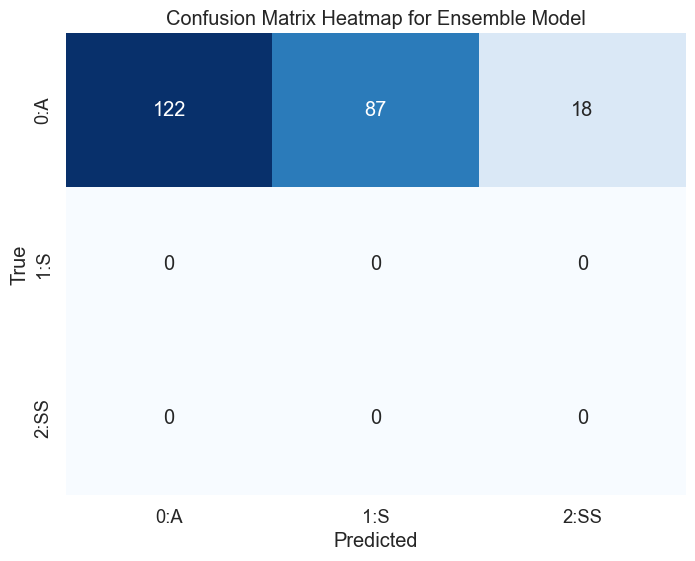

In [57]:
eb_accuracy = accuracy_score(pred, y_test)
eb_matrix = confusion_matrix(pred, y_test)
eb_report = classification_report(pred, y_test)

print('Accuracy of Ensemble Model : ', round(eb_accuracy, 3))
print('Confusion Matrix of Ensemble Model : ', eb_matrix)
print('Classification Report of Ensemble Model: \n\n', eb_report)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(eb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap for Ensemble Model")
plt.show()

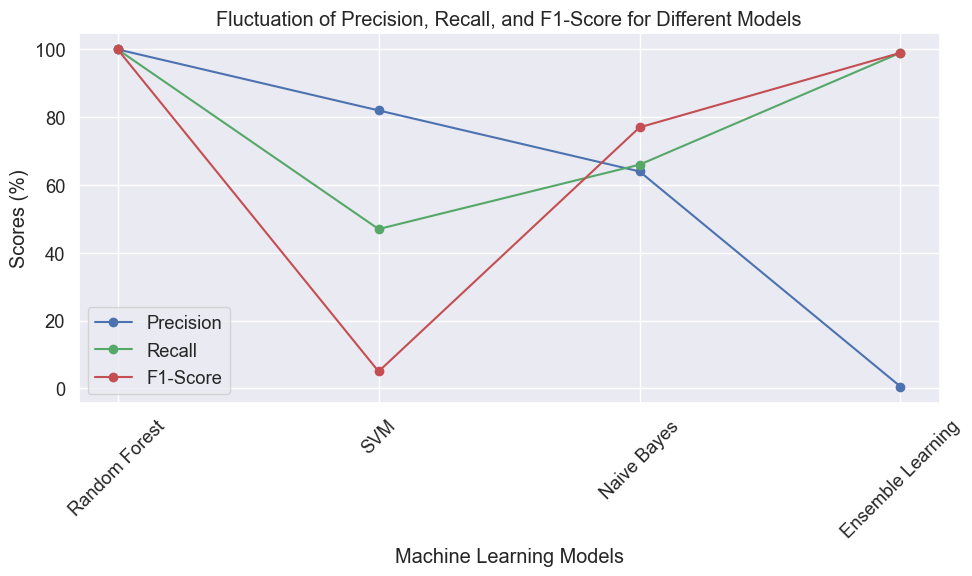

In [68]:
#Plot the evaluation metrics of each model in one figure

# Model names
models = ['Random Forest', 'SVM', 'Naive Bayes', 'Ensemble Learning']

# Precision scores
precision = [100, 82, 64, eb_accuracy]

# Recall scores
recall = [100, 47, 66, 99]

# F1-score scores
f1_score = [100, 5, 77, 99]

# X-axis values (models)
x = range(len(models))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot precision scores
ax.plot(x, precision, marker='o', linestyle='-', color='b', label='Precision')

# Plot recall scores
ax.plot(x, recall, marker='o', linestyle='-', color='g', label='Recall')

# Plot F1-score scores
ax.plot(x, f1_score, marker='o', linestyle='-', color='r', label='F1-Score')

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.set_xlabel('Machine Learning Models')

# Set y-axis label
ax.set_ylabel('Scores (%)')

# Set plot title
ax.set_title('Fluctuation of Precision, Recall, and F1-Score for Different Models')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()